**Download** (right-click, save target as ...) this page as a jupyterlab notebook [ES-28](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab28/Lab28-TH.ipynb)

___

# <font color=darkred>Exercise Set 28: Assessing Fitness; Prediction Intervals </font>

**Medrano, Giovanni**

**R11521018**

ENGR 1330 ES-28 - Homework

___


## Exercise 1

[Consumer Reports](https://web.consumerreports.org/test/SEM/version12.htm?EXTKEY=SG72CR0&ds_rl=1265560&ds_rl=1247084&ds_rl=1247078&gclid=EAIaIQobChMI_r_ljY2D9wIV3nxvBB2H4A5UEAAYASAAEgLqPvD_BwE&gclsrc=aw.ds) once tabulated the list of vehicle weights versus overall gasoline mileage for several different sizes and types of cars:

|Weight (lbs)|Mileage (mpg)|
|---:|---:|
|2775|33|
|2495|27|
|2405|29|
|2545|28|
|2270|34|
|2560|24|
|3050|23| 
|3710|24|
|3085|23|
|2940|21|
|2395|26|
|3325|20|
|3200|21|
|3450|19|
|3515|21|
|3495|19|
|4010|19|
|4205|17| 
|2900|24|
|2555|28|
|2790|21|
|2190|34|

Fit a linear data model to the data, plot the data and model.  Determine the equation of the data model and the corresponding RMSE and R$^2$ value.

Based on your results, how well are the data modeled by a linear data model?  How might a better data model be obtained?

In [17]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import statistics
import statsmodels.formula.api as smf

df=pd.read_csv('lab28.csv')
df

,Weight,Mileage
0,2775,33
1,2495,27
2,2405,29
3,2545,28
4,2270,34
5,2560,24
6,3050,23
7,3710,24
8,3085,23
9,2940,21


In [21]:
df.describe()

,Weight,Mileage
count,22.000000,22.000000
mean,2993.863636,24.318182
std,565.455846,5.008434
min,2190.000000,17.000000
25%,2547.500000,21.000000
50%,2920.000000,23.500000
75%,3418.750000,27.750000
max,4205.000000,34.000000


In [22]:
weight = df['Weight'].tolist()
print(weight)
milage = df['Mileage'].tolist()
print(milage)

[2775, 2495, 2405, 2545, 2270, 2560, 3050, 3710, 3085, 2940, 2395, 3325, 3200, 3450, 3515, 3495, 4010, 4205, 2900, 2555, 2790, 2190]
[33, 27, 29, 28, 34, 24, 23, 24, 23, 21, 26, 20, 21, 19, 21, 19, 19, 17, 24, 28, 21, 34]


In [24]:
model = smf.ols('Mileage ~ Weight', data=df)
model = model.fit()

slope = model.params[1]
Rsquare = model.rsquared
RMSE = math.sqrt(model.mse_total)
print('The RMSE is:',RMSE,'\nThe R^2 is:',Rsquare)

The RMSE is: 5.00843444445623 
The R^2 is: 0.6422518727541691


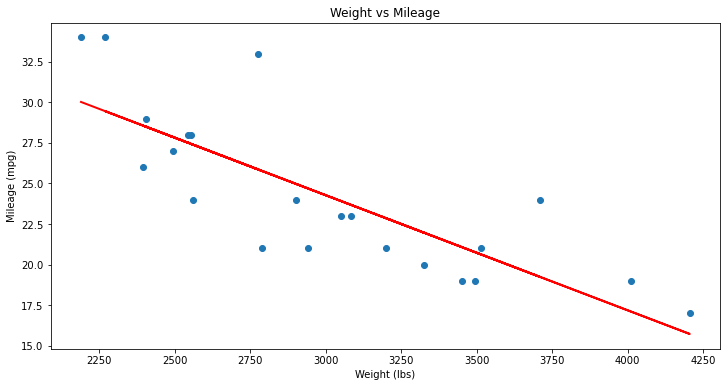

In [27]:
mP = model.predict()


plt.figure(figsize=(12, 6))
plt.plot(df['Weight'], df['Mileage'], 'o')           
plt.plot(df['Weight'], mP, 'r', linewidth=2)   
plt.xlabel('Weight (lbs)')
plt.ylabel('Mileage (mpg)')
plt.title('Weight vs Mileage')

plt.show()

# The fit could be improved by the use of prediction bounds along with CI

# However overall the fit is great considering the amount of outliers.